In [36]:
!pip install vecstack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
from vecstack import stacking
import pandas as pd
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn import metrics
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

import warnings 
warnings.filterwarnings("ignore")


Importing and Mounting Drive

In [38]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


Reading Training and Testing Data

In [39]:
trainfile =  r'/gdrive/MyDrive/CIS508_IA3/RevisedHomesiteTrain1.csv'
traindata = pd.read_csv(trainfile)


testfile  = r'/gdrive/MyDrive/CIS508_IA3/RevisedHomesiteTest1.csv'
testdata  = pd.read_csv(testfile)

print(traindata.shape)
print(testdata.shape)
print(traindata.head())

(65000, 596)
(173836, 596)
   CoverageField11A  CoverageField11B  CoverageField1A  CoverageField1B  \
0                 2                 1               17               23   
1                 5                 9                6                8   
2                 4                 6                7               12   
3                15                23                3                2   
4                 4                 6                8               13   

   CoverageField2A  CoverageField2B  CoverageField3A  CoverageField3B  \
0               17               23               15               22   
1                6                8                5                7   
2                7               12                6               10   
3                3                2                2                2   
4                8               13                7               11   

   CoverageField4A  CoverageField4B  ...  PropertyField38_N  \
0               16  

In [40]:
df = pd.read_csv(trainfile, index_col=False)
df

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX,QuoteConversion_Flag
0,2,1,17,23,17,23,15,22,16,22,...,1,0,0,1,0,1,0,0,0,0
1,5,9,6,8,6,8,5,7,5,8,...,1,0,0,1,0,0,0,1,0,0
2,4,6,7,12,7,12,6,10,7,11,...,1,0,0,1,0,0,0,1,0,0
3,15,23,3,2,3,2,2,2,3,2,...,1,0,0,1,0,0,0,0,1,0
4,4,6,8,13,8,13,7,11,7,13,...,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64995,3,5,9,15,9,15,8,13,8,14,...,1,0,0,1,0,1,0,0,0,0
64996,5,9,14,21,14,21,13,20,13,21,...,1,0,0,1,0,0,0,0,1,0
64997,7,14,3,2,3,3,2,2,3,2,...,1,0,0,1,0,0,0,1,0,0
64998,5,9,15,22,15,22,13,21,14,21,...,1,0,0,1,0,0,0,1,0,0


Plotting Chart

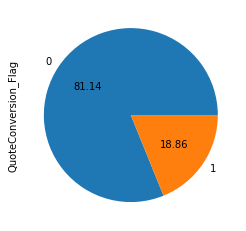

In [41]:
y=df['QuoteConversion_Flag']
y.value_counts()
y.value_counts().plot.pie(autopct='%.2f')

Column Information about the data

In [42]:
traindata.info()
print()
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Columns: 596 entries, CoverageField11A to QuoteConversion_Flag
dtypes: float64(5), int64(591)
memory usage: 295.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173836 entries, 0 to 173835
Columns: 596 entries, CoverageField11A to GeographicField64
dtypes: float64(5), int64(590), object(1)
memory usage: 790.5+ MB


Checking for missing values

In [43]:
traindata.isna().sum().sort_values(ascending=False)

CoverageField11A        0
PersonalField17_YU      0
PersonalField17_YW      0
PersonalField17_YX      0
PersonalField17_YY      0
                       ..
PersonalField64         0
PersonalField65         0
PersonalField66         0
PersonalField67         0
QuoteConversion_Flag    0
Length: 596, dtype: int64

Checking statistics of the data

In [44]:
traindata.describe()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX,QuoteConversion_Flag
count,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,...,65000.000000,65000.000000,65000.0,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000,65000.000000
mean,7.798892,12.954892,9.014585,12.995831,9.060000,13.017308,9.064538,13.017877,8.973785,13.011031,...,0.974969,0.020292,0.0,0.976262,0.023738,0.361862,0.120908,0.267631,0.249600,0.188646
std,5.304856,7.259023,5.586114,7.217093,5.568791,7.207118,5.588694,7.212825,5.564675,7.203325,...,0.156220,0.140999,0.0,0.152234,0.152234,0.480543,0.326022,0.442727,0.432785,0.391230
min,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,5.000000,7.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,13.000000,8.000000,13.000000,8.000000,13.000000,8.000000,13.000000,8.000000,13.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,19.000000,12.000000,19.000000,12.000000,19.000000,12.000000,19.000000,12.000000,19.000000,...,1.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Getting the list of column names

In [45]:
traincols = list(traindata.columns.values)
print(traincols)
testcols = list(testdata.columns.values)
print(testcols)

['CoverageField11A', 'CoverageField11B', 'CoverageField1A', 'CoverageField1B', 'CoverageField2A', 'CoverageField2B', 'CoverageField3A', 'CoverageField3B', 'CoverageField4A', 'CoverageField4B', 'CoverageField5A', 'CoverageField5B', 'CoverageField6A', 'CoverageField6B', 'Field10', 'Field11', 'Field7', 'Field8', 'Field9', 'GeographicField10A', 'GeographicField10B', 'GeographicField11A', 'GeographicField11B', 'GeographicField12A', 'GeographicField12B', 'GeographicField13A', 'GeographicField13B', 'GeographicField14A', 'GeographicField14B', 'GeographicField15A', 'GeographicField15B', 'GeographicField16A', 'GeographicField16B', 'GeographicField17A', 'GeographicField17B', 'GeographicField18A', 'GeographicField18B', 'GeographicField19A', 'GeographicField19B', 'GeographicField1A', 'GeographicField1B', 'GeographicField20A', 'GeographicField20B', 'GeographicField21A', 'GeographicField21B', 'GeographicField22A', 'GeographicField22B', 'GeographicField23A', 'GeographicField23B', 'GeographicField24A',

Dropping the columns

In [46]:
testdata.drop(labels=['GeographicField64_CA', 'GeographicField64_IL','GeographicField64_NJ','GeographicField64_TX'], axis=1, inplace=True)

One hot encoding on training data

In [47]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
Xcat = pd.DataFrame(ohe.fit_transform(testdata[['GeographicField64']]),columns=ohe.get_feature_names_out(),index=testdata.index)
testdata = pd.concat([testdata,Xcat],axis=1)
testdata.drop('GeographicField64',axis=1,inplace=True)
testdata.head()

,CoverageField11A,CoverageField11B,CoverageField1A,CoverageField1B,CoverageField2A,CoverageField2B,CoverageField3A,CoverageField3B,CoverageField4A,CoverageField4B,...,PropertyField37_Y,PropertyField38_N,PropertyField38_Y,GeographicField63_,GeographicField63_N,GeographicField63_Y,GeographicField64_CA,GeographicField64_IL,GeographicField64_NJ,GeographicField64_TX
0,13,22,4,4,4,4,3,3,3,4,...,1,1,0,0,0,1,0.0,1.0,0.0,0.0
1,4,5,8,14,8,14,7,12,8,13,...,0,1,0,0,1,0,0.0,0.0,1.0,0.0
2,3,3,11,18,11,18,10,16,10,18,...,0,1,0,0,1,0,0.0,0.0,1.0,0.0
3,5,9,14,22,15,22,13,20,22,25,...,0,1,0,0,1,0,0.0,0.0,0.0,1.0
4,12,21,4,5,4,5,4,4,4,5,...,0,1,0,0,1,0,1.0,0.0,0.0,0.0


In [48]:
Xtrain = traindata[traincols[0:len(traincols)-1]].copy()
Ytrain = traindata[['QuoteConversion_Flag']].copy()
print(Xtrain.shape)
print(Ytrain.shape)
Xtesting = testdata.copy()
print(Xtesting.shape)

(65000, 595)
(65000, 1)
(173836, 595)


Splitting the dataset

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size = 0.33) 

Without SMOTE

In [62]:
dt1 = DecisionTreeClassifier()
dectree= dt1.fit(X_train, Y_train)
Y_PredNew = dt1.predict(X_test)
Y_PredNew_proba = dt1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(dt1.score(X_test, Y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Y_test,Y_PredNew))


Accuracy Score:0.883403
Confusion Matrix for Decision Tree
[[16124  1364]
 [ 1137  2825]]


In [52]:
kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = dectree.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/DT01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/DT01.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,10,1.0


In [61]:
mlp1 = MLPClassifier()
mlpt = mlp1.fit(X_train, Y_train)
Y_PredNew = mlp1.predict(X_test)
Y_PredNew_proba = mlp1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(mlp1.score(X_test, Y_test)))
print("Confusion Matrix for MLP")
print(confusion_matrix(Y_test,Y_PredNew))

Accuracy Score:0.838415
Confusion Matrix for MLP
[[17197   291]
 [ 3175   787]]


In [54]:
kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = mlpt.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/MLP01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/MLP01.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,1.781192e-03
1,5,3.142483e-03
2,7,5.158499e-01
3,9,2.082820e-07
4,10,4.120520e-05


In [60]:
rf1 =  RandomForestClassifier()
randfor = rf1.fit(X_train, Y_train)
Y_PredNew = rf1.predict(X_test)
Y_PredNew_proba = rf1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(rf1.score(X_test, Y_test)))
print("Confusion Matrix for RandomForestClassifier")
print(confusion_matrix(Y_test,Y_PredNew))

Accuracy Score:0.907133
Confusion Matrix for MLP
[[17199   289]
 [ 1703  2259]]


In [57]:
kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = randfor.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/RF01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/RF01.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.05
1,5,0.08
2,7,0.08
3,9,0.01
4,10,0.27


In [63]:
from sklearn.svm import LinearSVC 
svm1 =  LinearSVC()
lsvm = svm1.fit(X_train, Y_train)
Y_PredNew = svm1.predict(X_test)
print("Accuracy Score:{0:6f}".format(svm1.score(X_test, Y_test)))
print("Confusion Matrix for L SVC")
print(confusion_matrix(Y_test,Y_PredNew))

kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = lsvm.predict(Xtesting)
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/LSVM01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/LSVM01.csv')
read.head()

Accuracy Score:0.814872
Confusion Matrix for MLP
[[17448    40]
 [ 3931    31]]


,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0


In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()
knnm = knn1.fit(X_train, Y_train)
Y_PredNew = knnm.predict(X_test)
print("Accuracy Score:{0:6f}".format(svm1.score(X_test, Y_test)))
print("Confusion Matrix for KNN")
print(confusion_matrix(Y_test,Y_PredNew))

kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = knnm.predict(Xtesting)
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/KNN01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/KNN01.csv')
read.head()

Accuracy Score:0.814872
Confusion Matrix for KNN
[[17448    40]
 [ 3931    31]]


,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,0
3,9,0
4,10,0


SMOTE

In [66]:
print("Now using SMOTE")
print(X_train.shape)
print(Y_train.shape)
print('Original dataset shape %s' % Counter(Y_train))



Now using SMOTE
(43550, 595)
(43550, 1)
Original dataset shape Counter({'QuoteConversion_Flag': 1})


Variations of SMOTE

SMOTE 1

QuoteConversion_Flag
0                       35250
1                       35250
dtype: int64
Resampled dataset shape Counter({'QuoteConversion_Flag': 1})


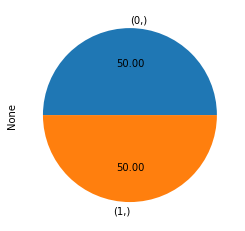

In [80]:
#sm = SMOTE(sampling_strategy='float', ratio=1)
sm = SMOTE(sampling_strategy=1)
X_res, Y_res = sm.fit_resample(X_train, Y_train)
print(Y_res.value_counts())
print('Resampled dataset shape %s' % Counter(Y_res))
Y_res.value_counts().plot.pie(autopct='%.2f')

SMOTE 2

QuoteConversion_Flag
0                       35250
1                       24675
dtype: int64
Resampled dataset shape Counter({'QuoteConversion_Flag': 1})


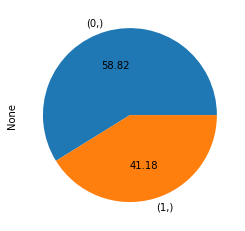

In [81]:
sm2 = SMOTE(sampling_strategy=0.7)
X_res2, Y_res2 = sm2.fit_resample(X_train, Y_train)
print(Y_res2.value_counts())
print('Resampled dataset shape %s' % Counter(Y_res2))
Y_res2.value_counts().plot.pie(autopct='%.2f')

SMOTE 3

QuoteConversion_Flag
0                       35250
1                       17625
dtype: int64
Resampled dataset shape Counter({'QuoteConversion_Flag': 1})


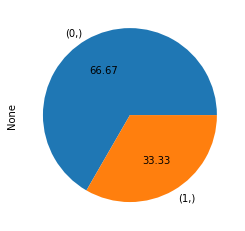

In [82]:
sm3 = SMOTE(sampling_strategy=0.5)
X_res3, Y_res3 = sm3.fit_resample(X_train, Y_train)
print(Y_res3.value_counts())
print('Resampled dataset shape %s' % Counter(Y_res3))
Y_res3.value_counts().plot.pie(autopct='%.2f')



Model Construction for Decision Tree Classifier

SMOTE 1 MODEL 1

In [84]:
dt1 = DecisionTreeClassifier()
dectree= dt1.fit(X_res, Y_res)
Y_PredNew = dt1.predict(X_test)
Y_PredNew_proba = dt1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(dt1.score(X_test, Y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Y_test,Y_PredNew))

Accuracy Score:0.877156
Confusion Matrix for Decision Tree
[[16004  1484]
 [ 1151  2811]]


In [85]:
kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = dectree.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/DT_SMOTE01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/DT_SMOTE01.csv')
read.head()

,QuoteNumber,QuoteConversion_Flag
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,10,1.0


SMOTE 2 MODEL 1

In [86]:
dt1 = DecisionTreeClassifier()
dectree = dt1.fit(X_res2, Y_res2)
Y_PredNew = dt1.predict(X_test)
Y_PredNew_proba = dt1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(dt1.score(X_test, Y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Y_test,Y_PredNew))
kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = dectree.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/DT_SMOTE02.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/DT_SMOTE02.csv')
read.head()

Accuracy Score:0.875524
Confusion Matrix for Decision Tree
[[15959  1529]
 [ 1141  2821]]


,QuoteNumber,QuoteConversion_Flag
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,10,0.0


SMOTE 3 MODEL 1

In [87]:
dt1 = DecisionTreeClassifier()
dectree=dt1.fit(X_res3, Y_res3)
Y_PredNew = dt1.predict(X_test)
Y_PredNew_proba = dt1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(dt1.score(X_test, Y_test)))
print("Confusion Matrix for Decision Tree")
print(confusion_matrix(Y_test,Y_PredNew))
kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = dectree.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/DT_SMOTE03.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/DT_SMOTE03.csv')
read.head()

Accuracy Score:0.880047
Confusion Matrix for Decision Tree
[[16049  1439]
 [ 1134  2828]]


,QuoteNumber,QuoteConversion_Flag
0,3,0.0
1,5,0.0
2,7,0.0
3,9,0.0
4,10,1.0


Model Construction for Multi-layer Perceptron Classifier with SMOTE

In [88]:
mlp1 = MLPClassifier()
mlpt = mlp1.fit(X_res, Y_res)
Y_PredNew = mlp1.predict(X_test)
Y_PredNew_proba = mlp1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(mlp1.score(X_test, Y_test)))
print("Confusion Matrix for MLP")
print(confusion_matrix(Y_test,Y_PredNew))
kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = mlpt.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/MLPSMOTE01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/MLPSMOTE01.csv')
read.head()


Accuracy Score:0.868252
Confusion Matrix for MLP
[[16357  1131]
 [ 1695  2267]]


,QuoteNumber,QuoteConversion_Flag
0,3,8.070327e-11
1,5,5.253649e-11
2,7,2.298063e-03
3,9,4.587063e-10
4,10,2.538521e-10


Model Construction for Random Forest Classifier with SMOTE

In [89]:
rf1 =  RandomForestClassifier()
randfor = rf1.fit(X_res, Y_res)
Y_PredNew = rf1.predict(X_test)
Y_PredNew_proba = rf1.predict_proba(X_test)
Y_PredNew_proba = Y_PredNew_proba[:,1]
print("Accuracy Score:{0:6f}".format(rf1.score(X_test, Y_test)))
print("Confusion Matrix for RandomForestClassifier")
print(confusion_matrix(Y_test,Y_PredNew))

kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = randfor.predict_proba(Xtesting)[:,1]
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/RFSMOTE01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/RFSMOTE01.csv')
read.head()

Accuracy Score:0.901072
Confusion Matrix for RandomForestClassifier
[[16762   726]
 [ 1396  2566]]


,QuoteNumber,QuoteConversion_Flag
0,3,0.09
1,5,0.17
2,7,0.09
3,9,0.00
4,10,0.22


Model Construction for Linear Support Vector Machine with SMOTE

In [90]:
from sklearn.svm import LinearSVC 
svm1 =  LinearSVC()
lsvm = svm1.fit(X_res, Y_res)
Y_PredNew = svm1.predict(X_test)
print("Accuracy Score:{0:6f}".format(svm1.score(X_test, Y_test)))
print("Confusion Matrix for L SVC")
print(confusion_matrix(Y_test,Y_PredNew))

kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = lsvm.predict(Xtesting)
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/LSVMSMOTE01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/LSVMSMOTE01.csv')
read.head()

Accuracy Score:0.525035
Confusion Matrix for L SVC
[[7899 9589]
 [ 599 3363]]


,QuoteNumber,QuoteConversion_Flag
0,3,1
1,5,1
2,7,1
3,9,0
4,10,1


Model Construction for K- Nearest Neighbor with SMOTE

In [91]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()
knnm = knn1.fit(X_res, Y_res)
Y_PredNew = svm1.predict(X_test)
print("Accuracy Score:{0:6f}".format(svm1.score(X_test, Y_test)))
print("Confusion Matrix for KNN")
print(confusion_matrix(Y_test,Y_PredNew))

kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = knnm.predict(Xtesting)
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/KNNSMOTE01.csv',index=False)
read = pd.read_csv('/gdrive/MyDrive/CIS508_IA3/KNNSMOTE01.csv')
read.head()

Accuracy Score:0.525035
Confusion Matrix for KNN
[[7899 9589]
 [ 599 3363]]


,QuoteNumber,QuoteConversion_Flag
0,3,0
1,5,0
2,7,1
3,9,0
4,10,0


Ensemble Methods Stacking

In [98]:
print("Ensemble methods for predictions")
models = [KNeighborsClassifier(), MLPClassifier(), LinearSVC(),RandomForestClassifier(), DecisionTreeClassifier()]
S_Train, S_Test = stacking(models,                   
                           X_res, Y_res, Xtesting,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

Ensemble methods for predictions
task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [5]

model  0:     [KNeighborsClassifier]
    fold  0:  [0.71773050]
    fold  1:  [0.71880851]
    fold  2:  [0.72096454]
    fold  3:  [0.71591489]
    ----
    MEAN:     [0.71835461] + [0.00182753]
    FULL:     [0.71835461]

model  1:     [MLPClassifier]
    fold  0:  [0.87756028]
    fold  1:  [0.89259574]
    fold  2:  [0.72243972]
    fold  3:  [0.89974468]
    ----
    MEAN:     [0.84808511] + [0.07298195]
    FULL:     [0.84808511]

model  2:     [LinearSVC]
    fold  0:  [0.66195745]
    fold  1:  [0.63126241]
    fold  2:  [0.50995745]
    fold  3:  [0.65248227]
    ----
    MEAN:     [0.61391489] + [0.06104018]
    FULL:     [0.61391489]

model  3:     [RandomForestClassifier]
    fold  0:  [0.93946099]
    fold  1:  [0.93946099]
    fold  2:  [0.93662411]
    fold  3:  [0.93662411]
    ----
    MEAN:     [0.93804255] + 

Hyperparameter Tuning for Random Forest

In [100]:
print("Randomized Search for Random Forest:")
parameters = {'min_samples_leaf': [10,500,5], 'max_depth':range(10,500,10), 'min_samples_split': range(10,100,5), 'max_features':(1,20,2)}
random =  RandomizedSearchCV(rf1,parameters)
random.fit(S_Train, Y_res)
bestparameters = random.best_params_
score3 = random.best_score_
model3 = RandomForestClassifier(**bestparameters)
model3.fit(S_Train, Y_res)
rf_pred = model3.predict(S_Test)
print("Best Parameters:")
print(bestparameters)
print("Best Score:")
print(score3)
model3_cv_score = cross_val_score(model3, S_Train, Y_res, cv=5, scoring = "roc_auc")
print("Mean AUC Score for Random Forest", model3_cv_score.mean())

kagsub = pd.DataFrame()
kagsub["QuoteNumber"] = Xtesting["QuoteNumber"]
kagsub["QuoteConversion_Flag"] = model3.predict(S_Test)
kagsub.to_csv('/gdrive/MyDrive/CIS508_IA3/RFHP01.csv',index=False)

Randomized Search for Random Forest:
Best Parameters:
{'min_samples_split': 50, 'min_samples_leaf': 500, 'max_features': 1, 'max_depth': 310}
Best Score:
0.9363262411347517
Mean AUC Score for Random Forest 0.9770177898496051
